<a href="https://colab.research.google.com/github/AnantChandra/google-colab/blob/main/air_pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anantchandra","key":"0d4a00a1837c8993c7fc12089269e19e"}'}

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download totoro29/air-pollution-level

Dataset URL: https://www.kaggle.com/datasets/totoro29/air-pollution-level
License(s): CC0-1.0
  0% 0.00/394k [00:00<?, ?B/s]
100% 394k/394k [00:00<00:00, 77.5MB/s]


In [8]:
!unzip air-pollution-level.zip

Archive:  air-pollution-level.zip
  inflating: Air Pollution.csv       


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('Air Pollution.csv')

In [11]:
data = data.rename(columns={'PM25 temporal coverage (%)': 'PM2.5 temporal coverage (%)'})

In [12]:
data.head()

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM2.5 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year
0,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,2022
1,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,2022
2,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,2022
3,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,2022
4,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,2022


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32191 entries, 0 to 32190
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country Name                 32191 non-null  object 
 1   City                         32191 non-null  object 
 2   Year                         32191 non-null  int64  
 3   PM2.5 (μg/m3)                15048 non-null  float64
 4   PM10 (μg/m3)                 21109 non-null  float64
 5   NO2 (μg/m3)                  22200 non-null  float64
 6   PM2.5 temporal coverage (%)  7275 non-null   float64
 7   PM10 temporal coverage (%)   5381 non-null   float64
 8   NO2 temporal coverage (%)    19890 non-null  float64
 9   Updated Year                 32191 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 2.5+ MB


In [14]:
mean_pm25 = data['PM2.5 (μg/m3)'].mean()
mean_pm10 = data['PM10 (μg/m3)'].mean()
mean_no2 = data['NO2 (μg/m3)'].mean()
mean_pm25_temp = data['PM2.5 temporal coverage (%)'].mean()
mean_pm10_temp = data['PM10 temporal coverage (%)'].mean()
mean_no2_temp = data['NO2 temporal coverage (%)'].mean()

In [15]:
def fillNAN(*argument):
    for item in argument:
        data[item] = data[item].fillna(data[item].mean())

In [16]:
fillNAN('PM2.5 (μg/m3)',
        'PM10 (μg/m3)',
        'NO2 (μg/m3)',
        'PM2.5 temporal coverage (%)',
        'PM10 temporal coverage (%)',
        'NO2 temporal coverage (%)')

In [17]:
data.head()

,Country Name,City,Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM2.5 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Updated Year
0,Afghanistan,Kabul,2019,119.77000,30.533252,20.619336,18.000000,90.5835,93.696804,2022
1,Albania,Durres,2015,22.92032,17.650000,26.630000,90.794096,90.5835,83.961187,2022
2,Albania,Durres,2016,14.32000,24.560000,24.780000,90.794096,90.5835,87.932605,2022
3,Albania,Elbasan,2015,22.92032,30.533252,23.960000,90.794096,90.5835,97.853881,2022
4,Albania,Elbasan,2016,22.92032,30.533252,26.260000,90.794096,90.5835,96.049636,2022


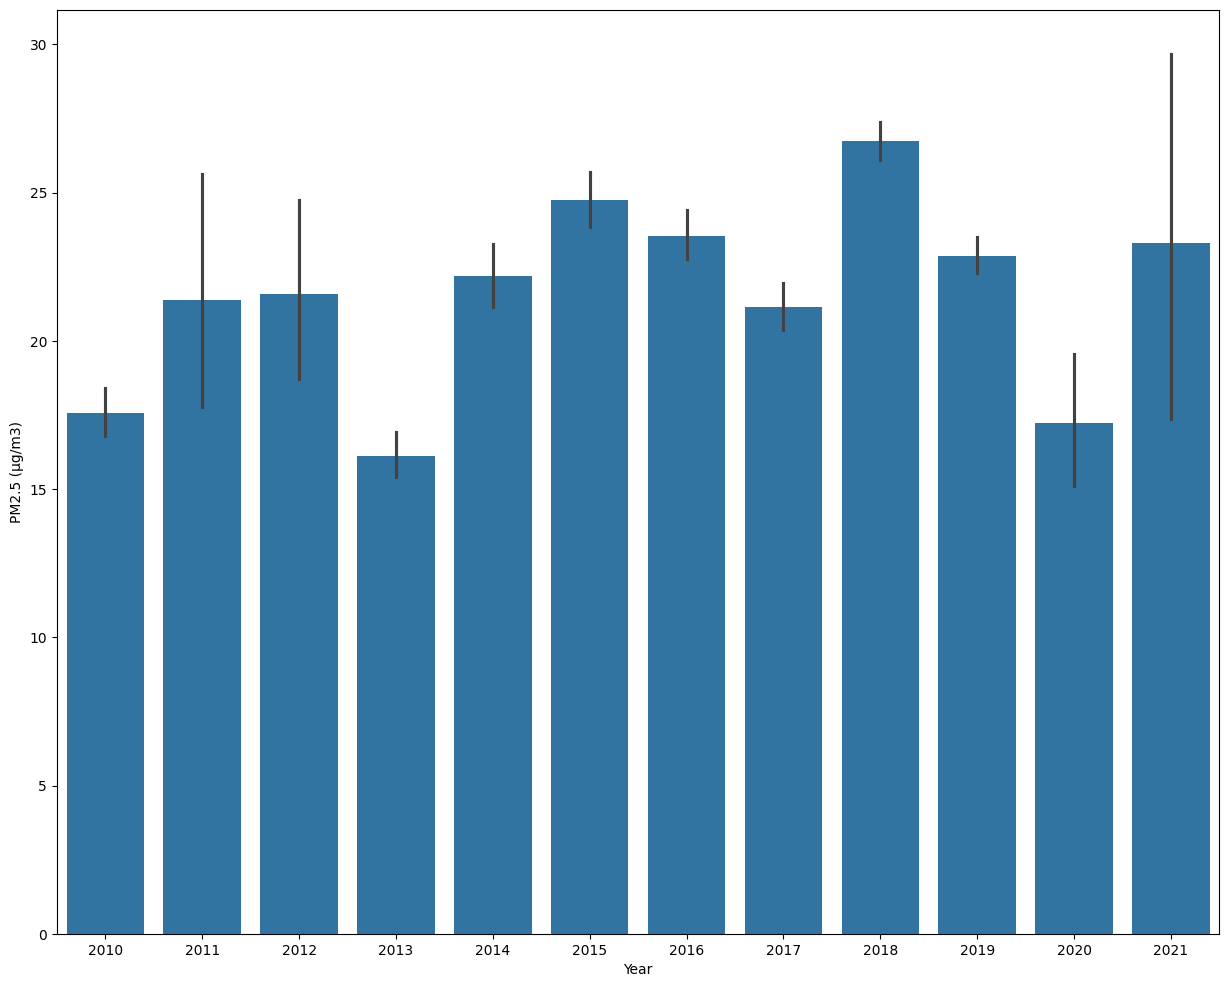

In [18]:
plt.figure(figsize=(15,12))
sns.barplot(x=data[data['PM2.5 (μg/m3)'] != mean_pm25]['Year'],
            y=data[data['PM2.5 (μg/m3)'] != mean_pm25]['PM2.5 (μg/m3)'])
plt.show()

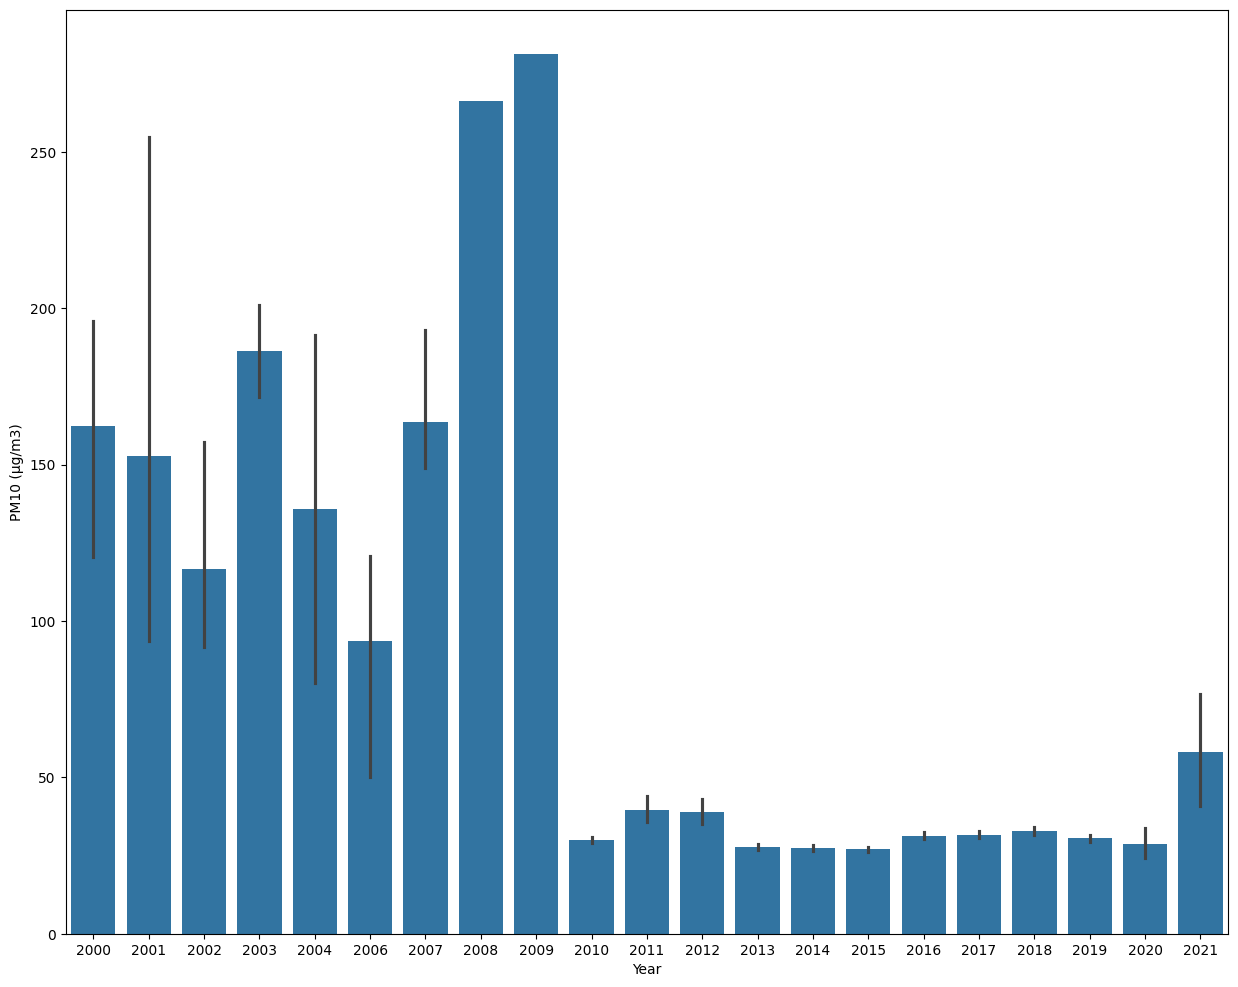

In [19]:
plt.figure(figsize=(15,12))
sns.barplot(x=data[data['PM10 (μg/m3)'] != mean_pm10]['Year'],
            y=data[data['PM10 (μg/m3)'] != mean_pm10]['PM10 (μg/m3)'])
plt.show()

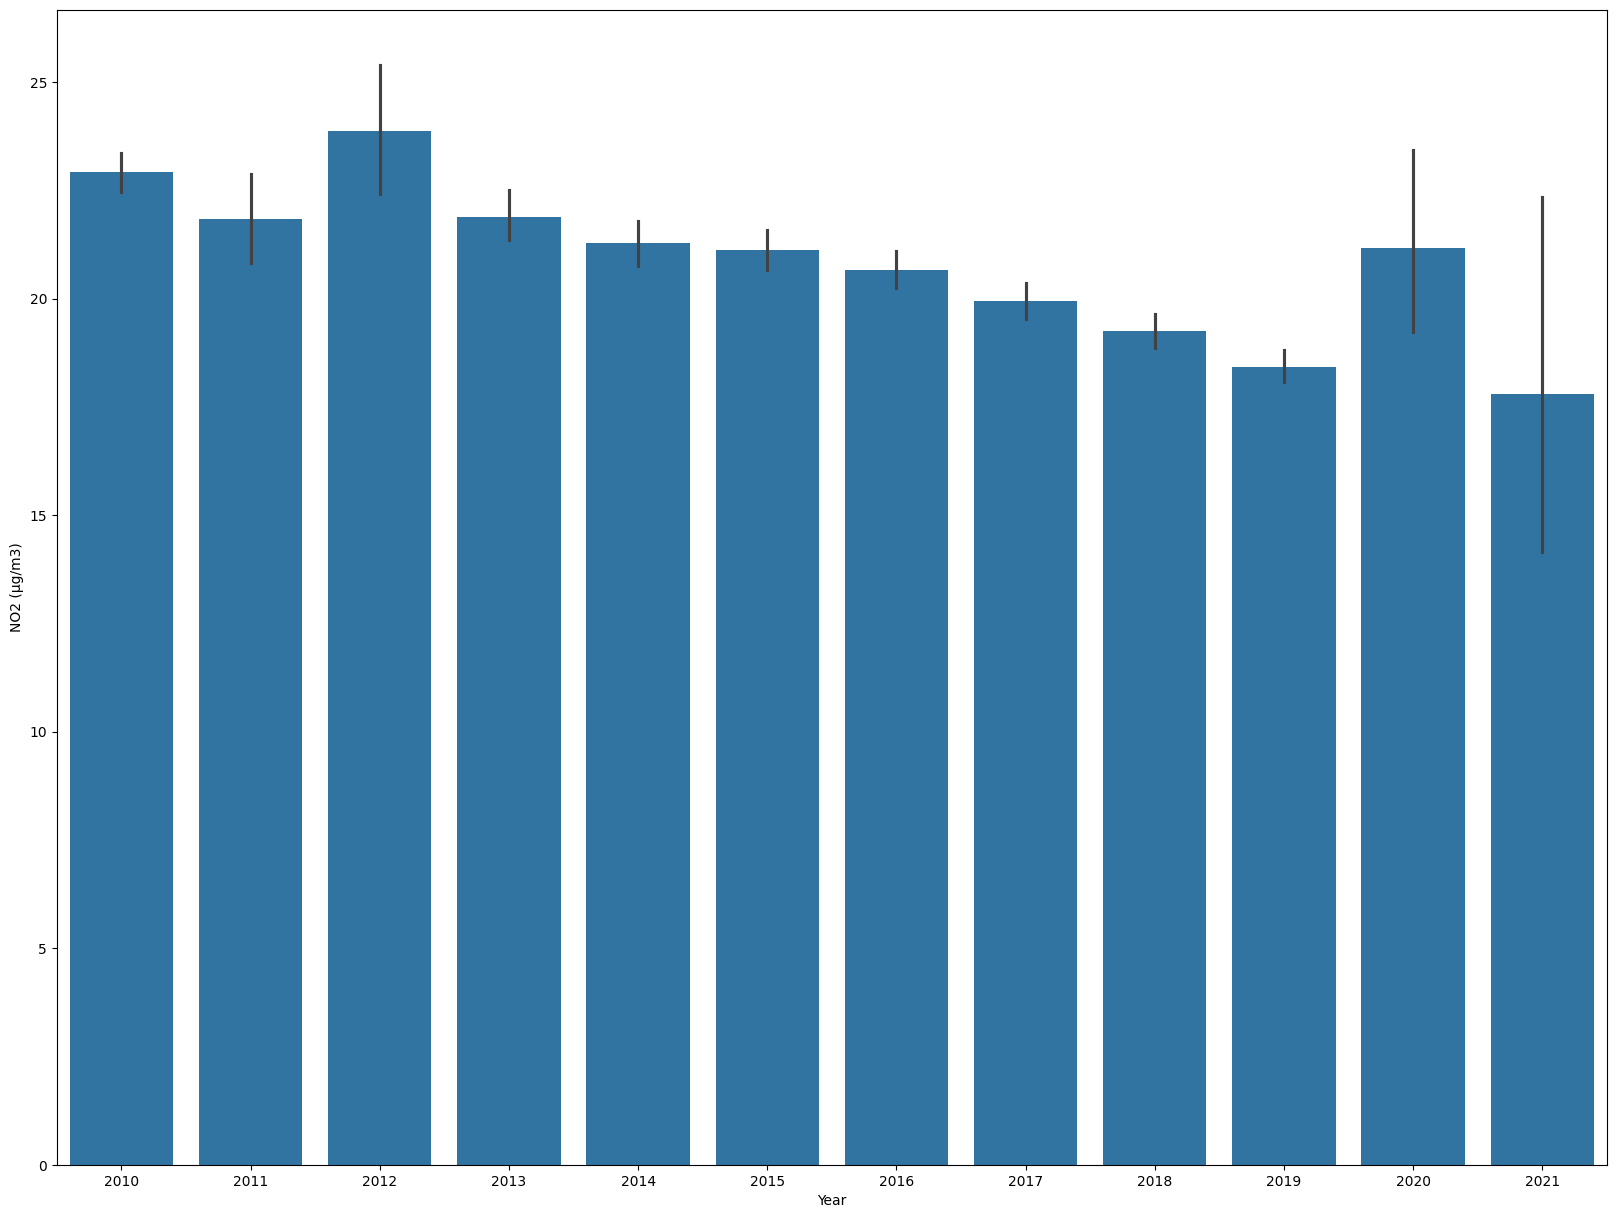

In [20]:
plt.figure(figsize=(20,15))
sns.barplot(x=data[data['NO2 (μg/m3)'] != mean_no2]['Year'],
            y=data[data['NO2 (μg/m3)'] != mean_no2]['NO2 (μg/m3)'])
plt.show()

<ipython-input-21-0506ca5f6f0b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(y = data[data['PM2.5 (μg/m3)'] > mean_pm25]['PM2.5 (μg/m3)'],


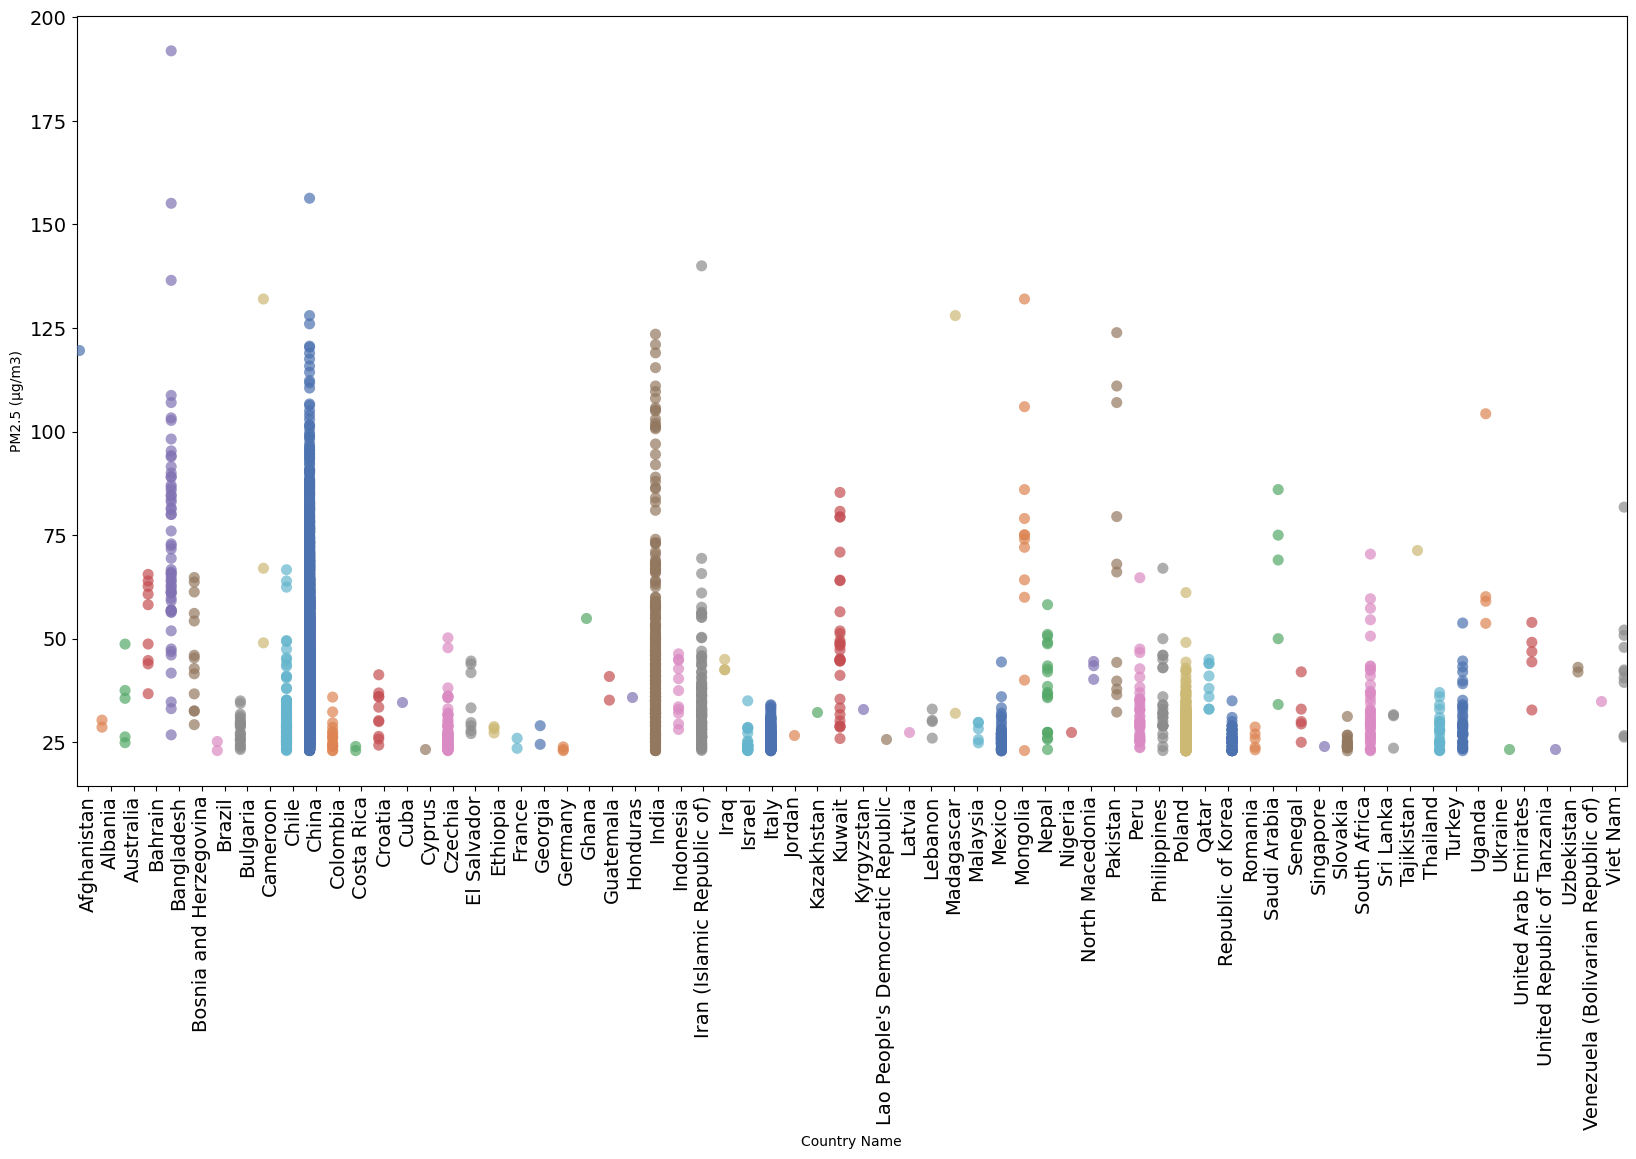

In [21]:
plt.figure(figsize=(20,10))
sns.stripplot(y = data[data['PM2.5 (μg/m3)'] > mean_pm25]['PM2.5 (μg/m3)'],
              x= data[data['PM2.5 (μg/m3)'] > mean_pm25]['Country Name'],
              size=8,
              palette="deep",
              dodge=True,
              jitter=False,
              linewidth=0,
              alpha=0.7)
plt.xticks(rotation = 90, size=14)
plt.yticks(size=14)
plt.show()

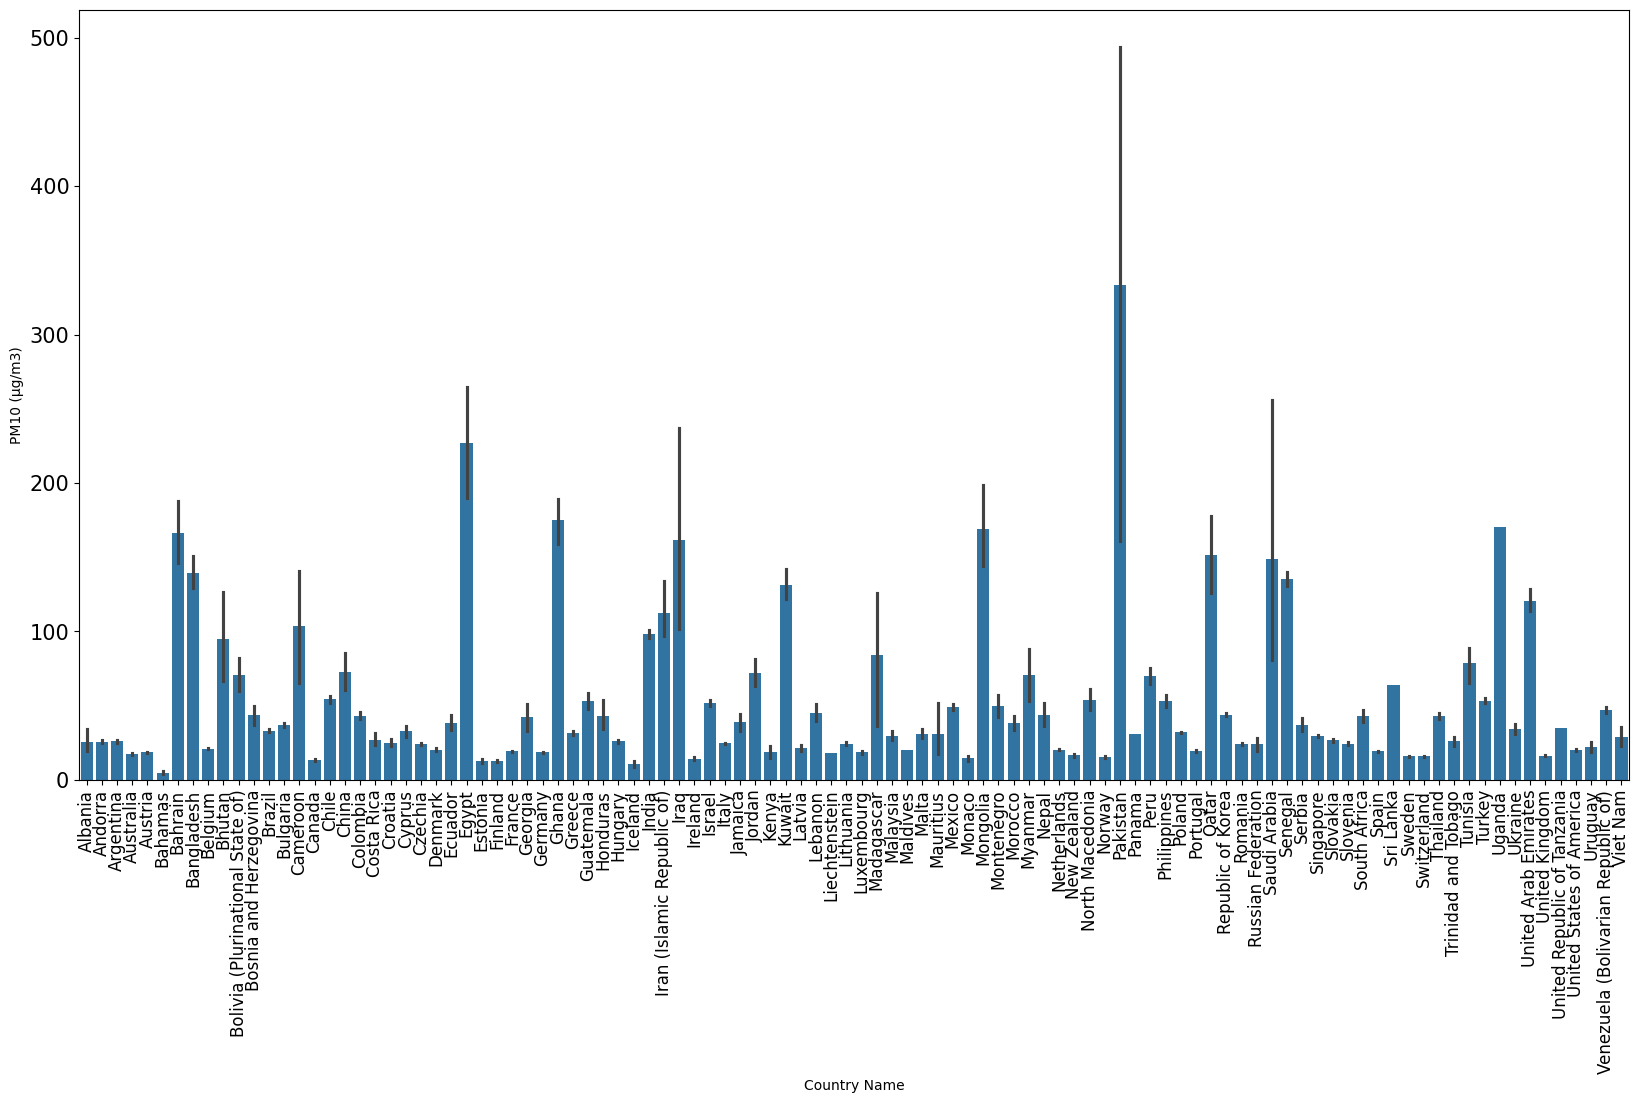

In [22]:
plt.figure(figsize=(20,10))
sns.barplot(x=data[data['PM10 (μg/m3)'] != mean_pm10]['Country Name'],
            y=data[data['PM10 (μg/m3)'] != mean_pm10]['PM10 (μg/m3)'])
plt.xticks(rotation=90, size=12)
plt.yticks(size=15)
plt.show()

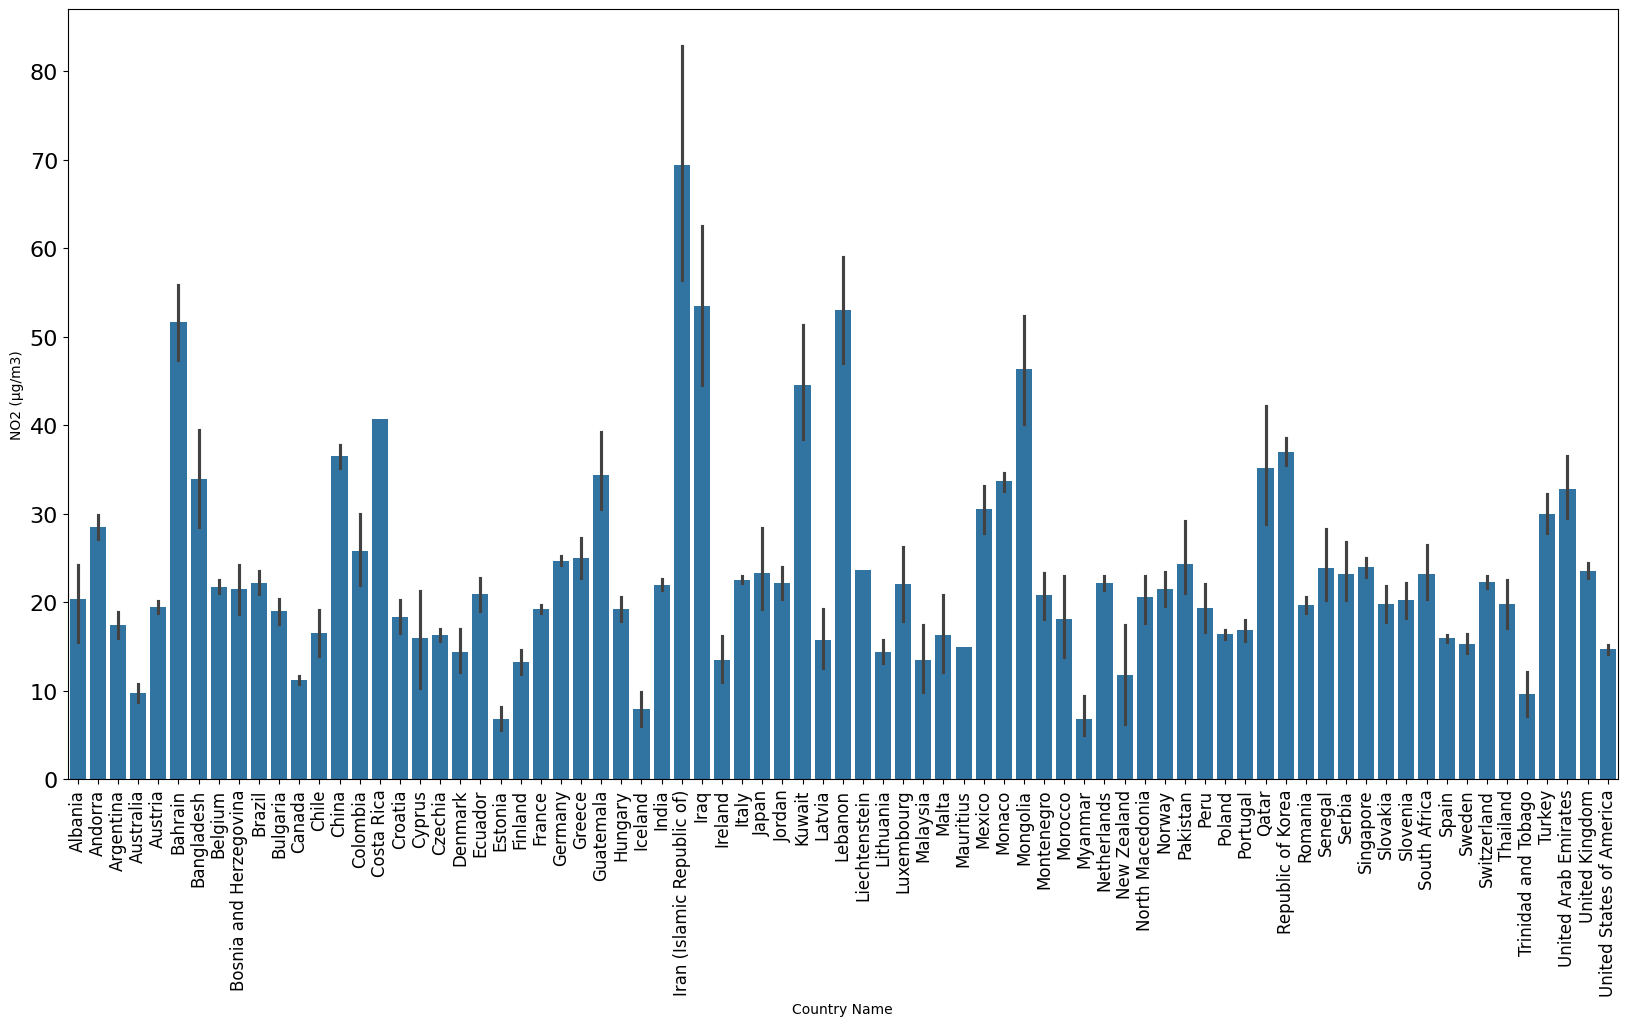

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(x = data[data['NO2 (μg/m3)'] != mean_no2]['Country Name'],
            y = data[data['NO2 (μg/m3)'] != mean_no2]['NO2 (μg/m3)'])
plt.xticks(rotation = 90, size=12)
plt.yticks(size=16)
plt.show()

<ipython-input-24-7d9a9aa6cf65>:2: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0'}` instead.

  sns.barplot(x=data[data['PM2.5 temporal coverage (%)'] != mean_pm25_temp]['Country Name'],


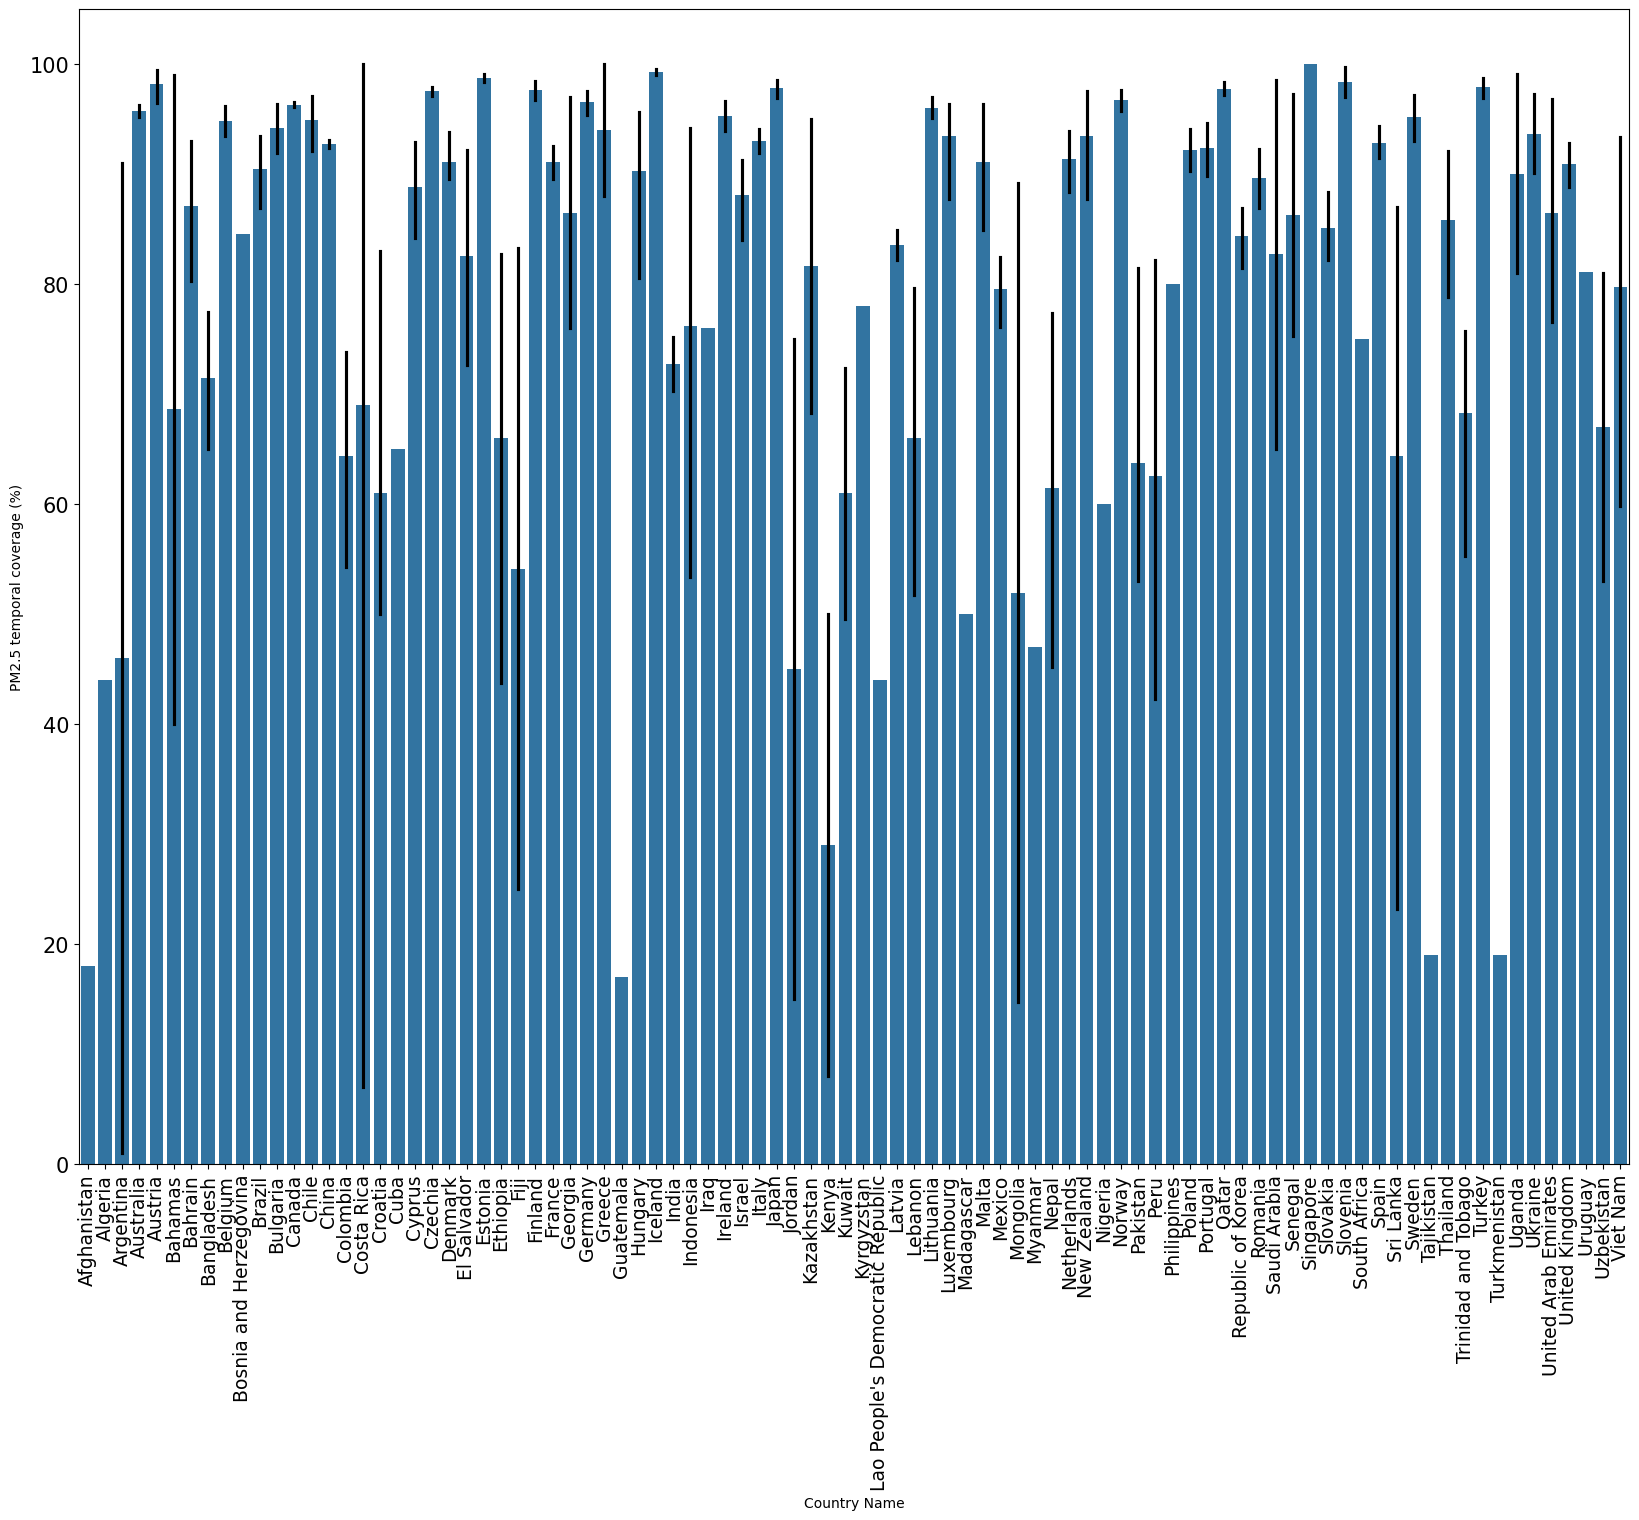

In [24]:
plt.figure(figsize=(20,15))
sns.barplot(x=data[data['PM2.5 temporal coverage (%)'] != mean_pm25_temp]['Country Name'],
            y=data[data['PM2.5 temporal coverage (%)'] != mean_pm25_temp]['PM2.5 temporal coverage (%)'],
            errcolor='0')
plt.xticks(rotation=90, size=13.5)
plt.yticks(size=15)
plt.show()

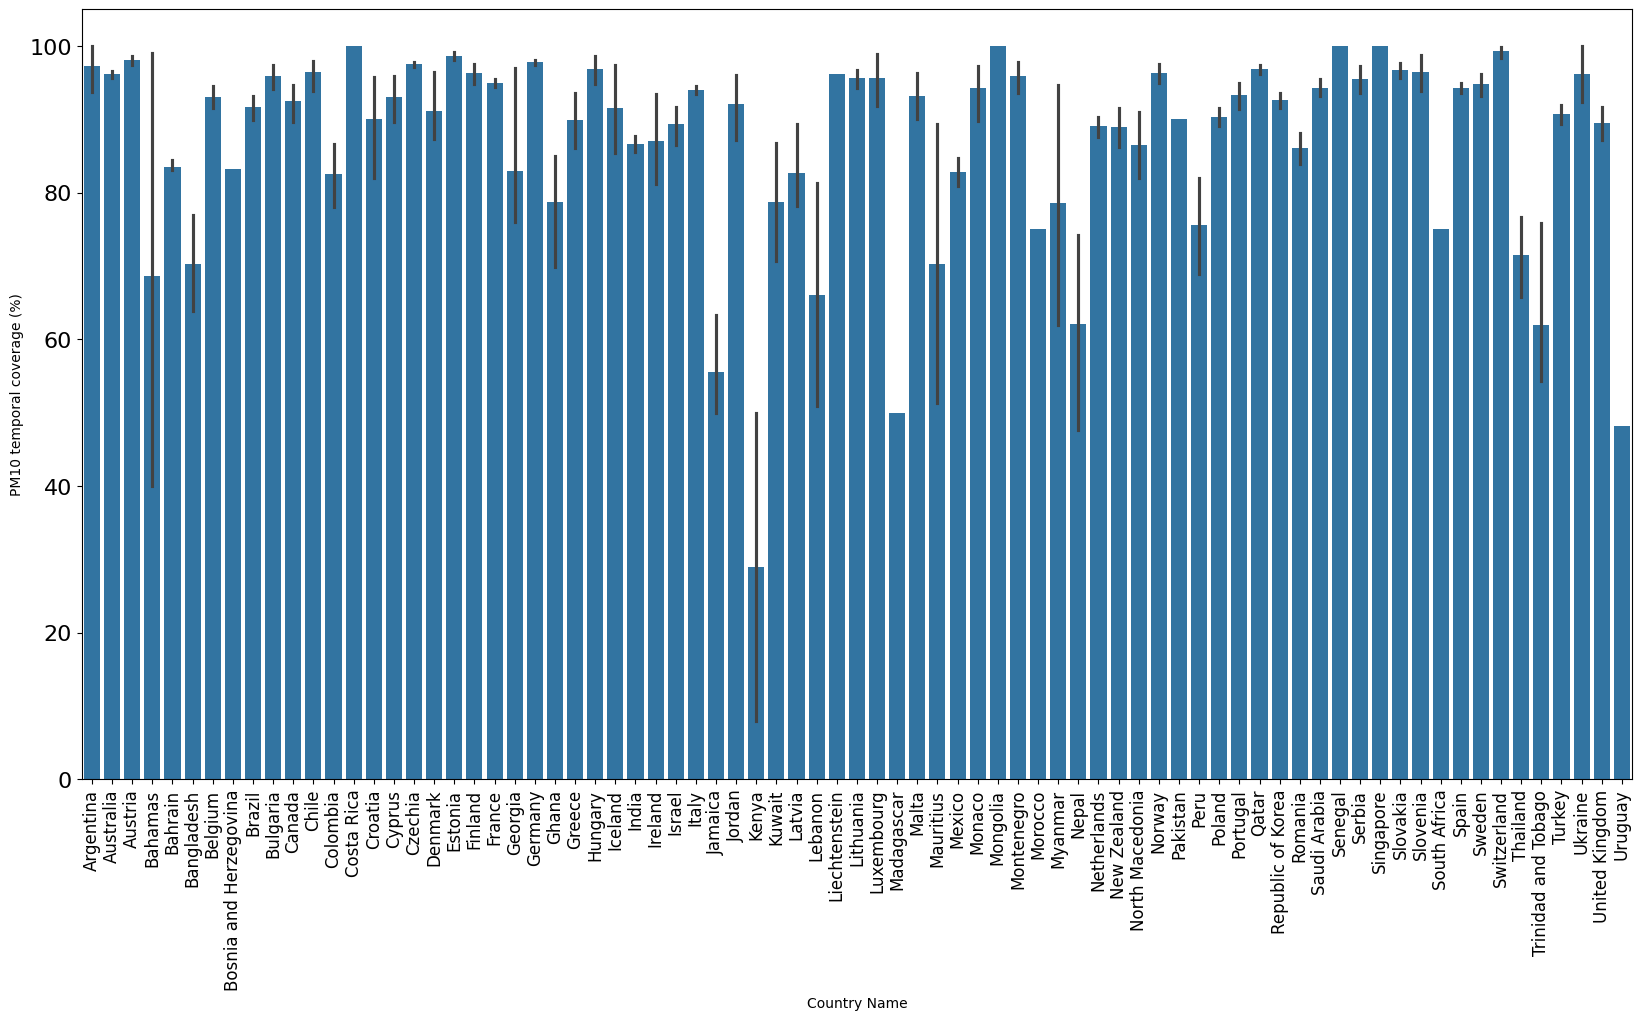

In [25]:
plt.figure(figsize=(20,10))
sns.barplot(x = data[data['PM10 temporal coverage (%)'] != mean_pm10_temp]['Country Name'],
            y = data[data['PM10 temporal coverage (%)'] != mean_pm10_temp]['PM10 temporal coverage (%)'])
plt.xticks(rotation = 90, size=12)
plt.yticks(size=16)
plt.show()

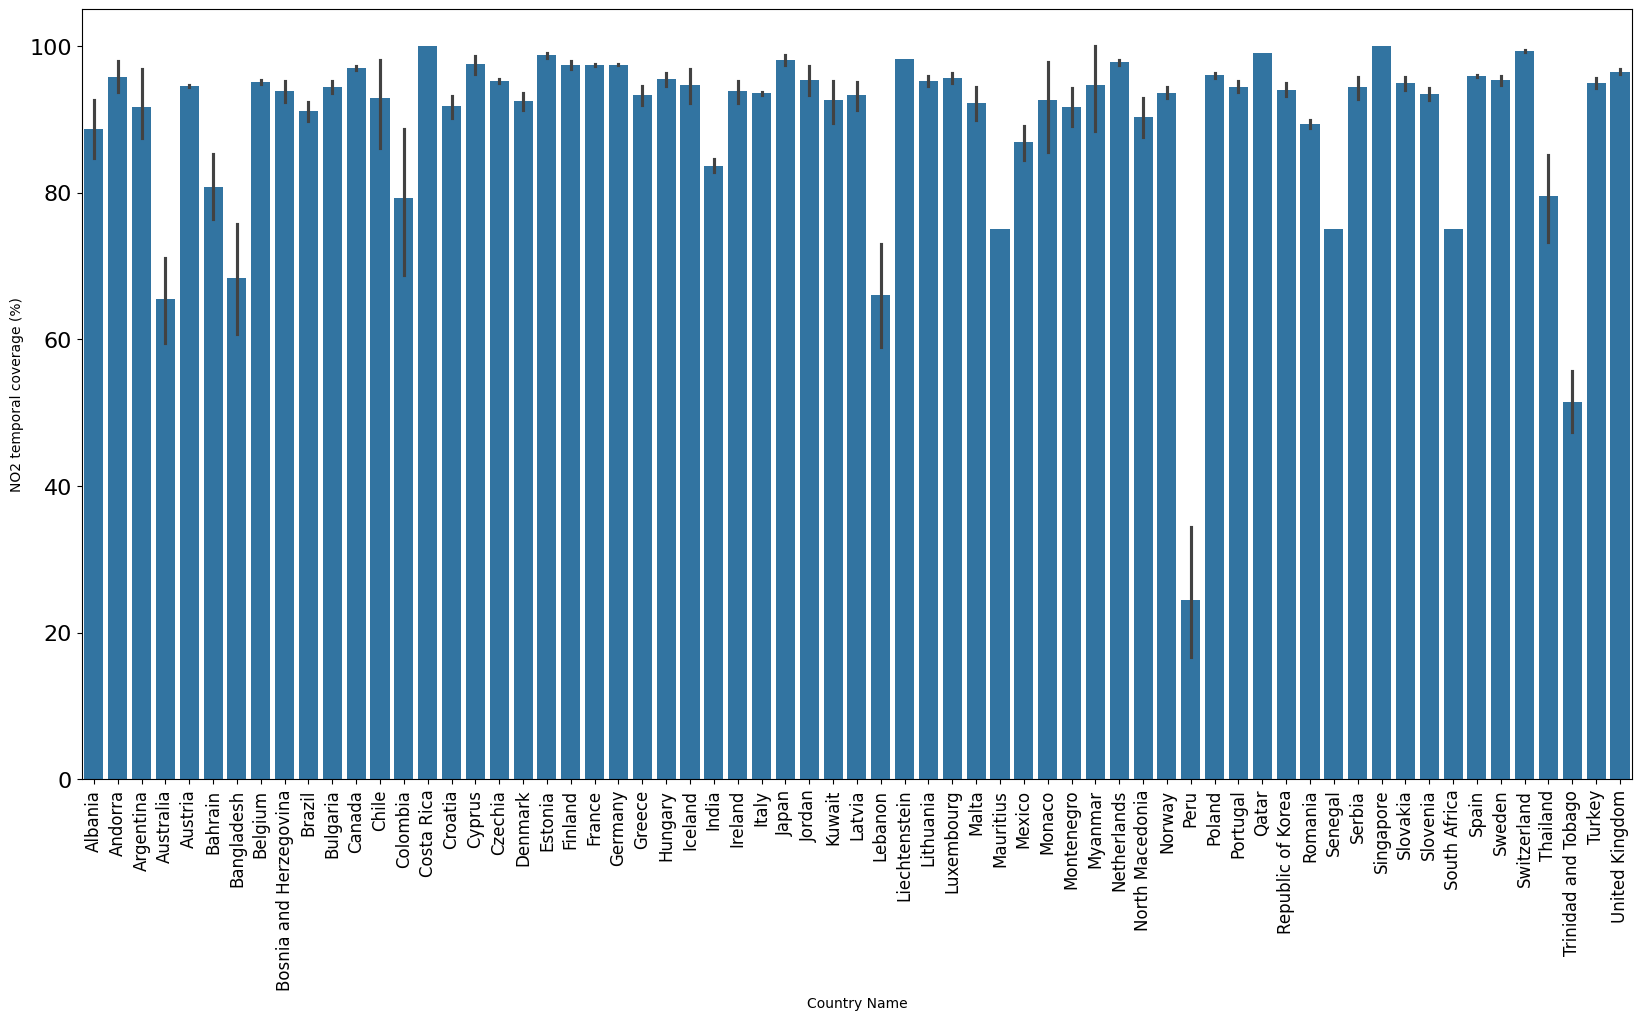

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(x = data[data['NO2 temporal coverage (%)'] != mean_no2_temp]['Country Name'],
            y = data[data['NO2 temporal coverage (%)'] != mean_no2_temp]['NO2 temporal coverage (%)'])
plt.xticks(rotation = 90, size=12)
plt.yticks(size=16)
plt.show()


<ipython-input-27-665a0f6483d9>:2: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0'}` instead.

  sns.barplot(x=data[data['PM2.5 temporal coverage (%)'] != mean_pm25_temp]['Year'],


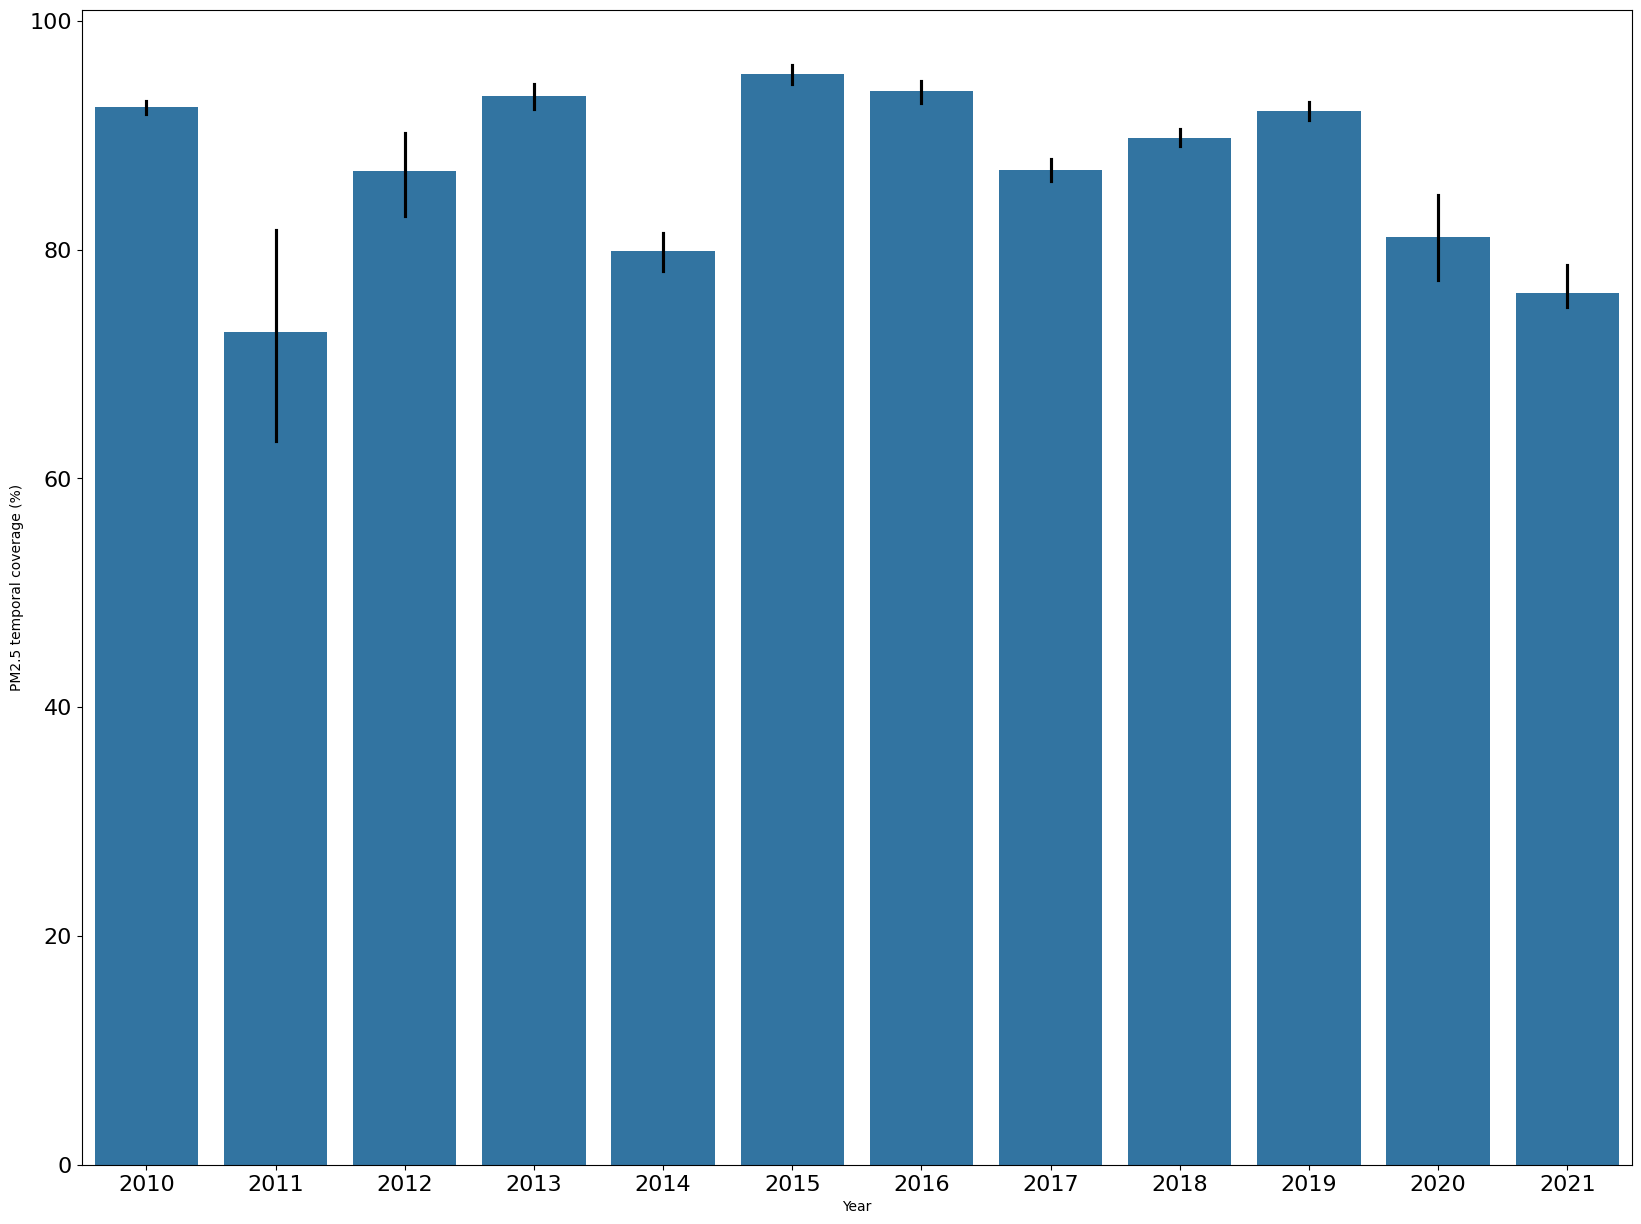

In [27]:
plt.figure(figsize=(20,15))
sns.barplot(x=data[data['PM2.5 temporal coverage (%)'] != mean_pm25_temp]['Year'],
            y=data[data['PM2.5 temporal coverage (%)'] != mean_pm25_temp]['PM2.5 temporal coverage (%)'],
            errcolor='0')
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

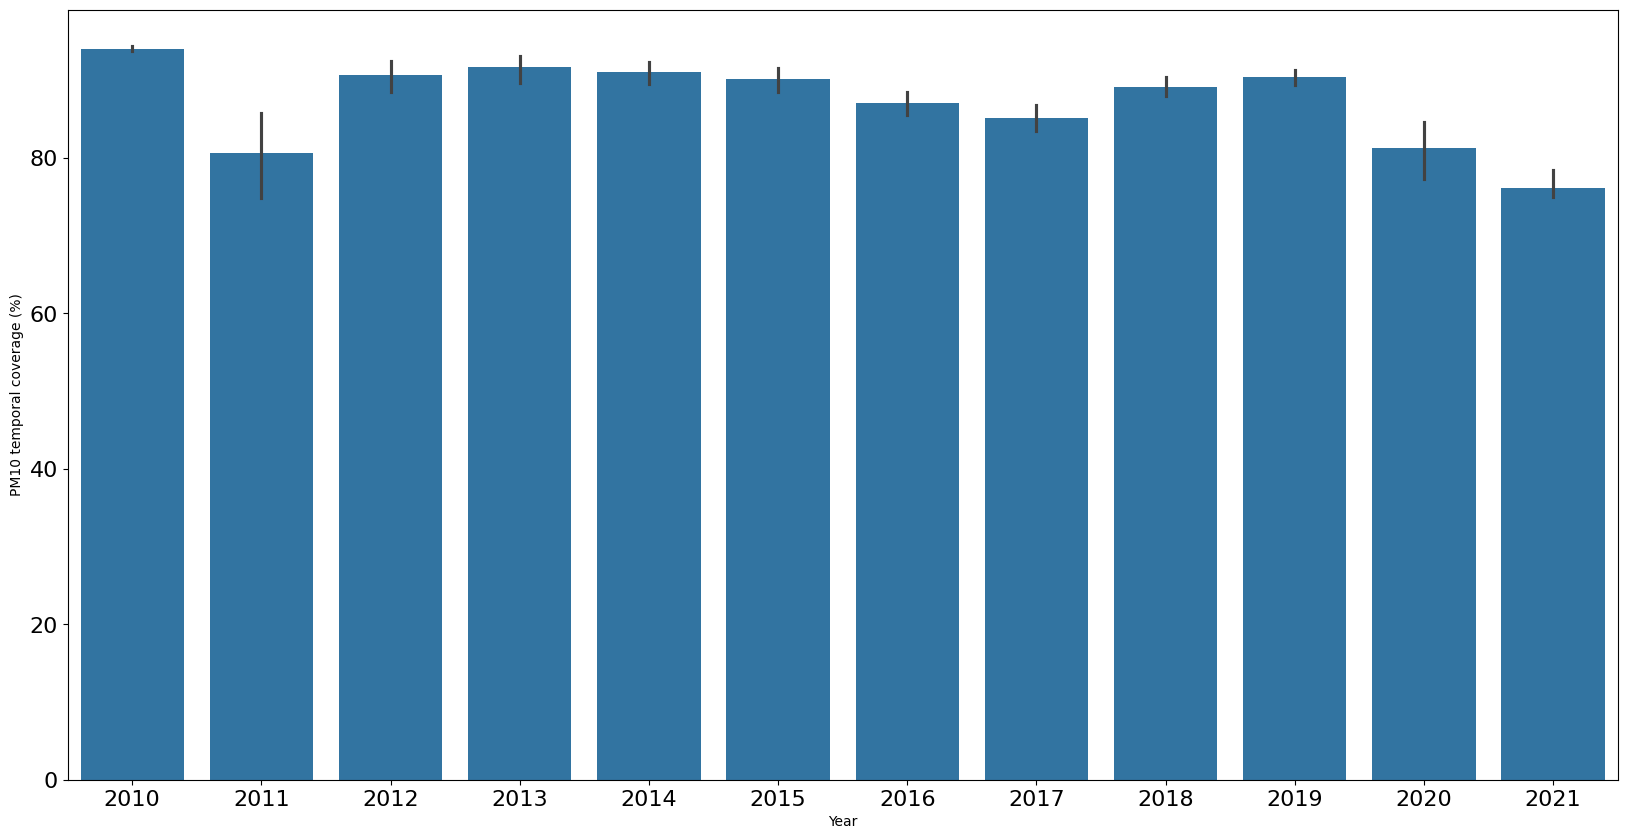

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x = data[data['PM10 temporal coverage (%)'] != mean_pm10_temp]['Year'],
            y = data[data['PM10 temporal coverage (%)'] != mean_pm10_temp]['PM10 temporal coverage (%)'])
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

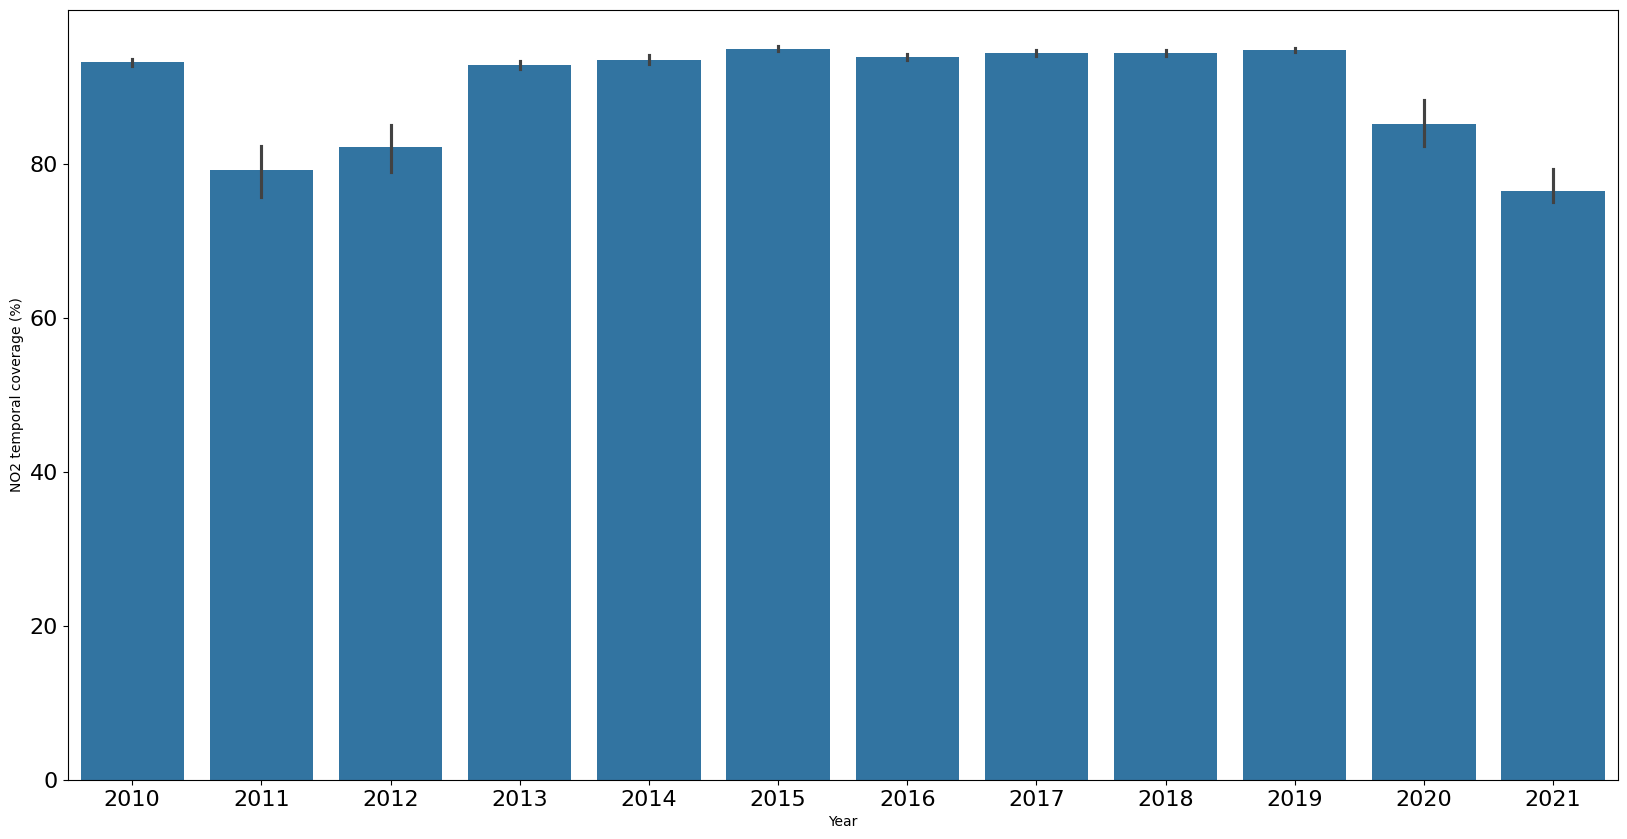

In [29]:
plt.figure(figsize=(20,10))
sns.barplot(x = data[data['NO2 temporal coverage (%)'] != mean_no2_temp]['Year'],
            y = data[data['NO2 temporal coverage (%)'] != mean_no2_temp]['NO2 temporal coverage (%)'])
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()